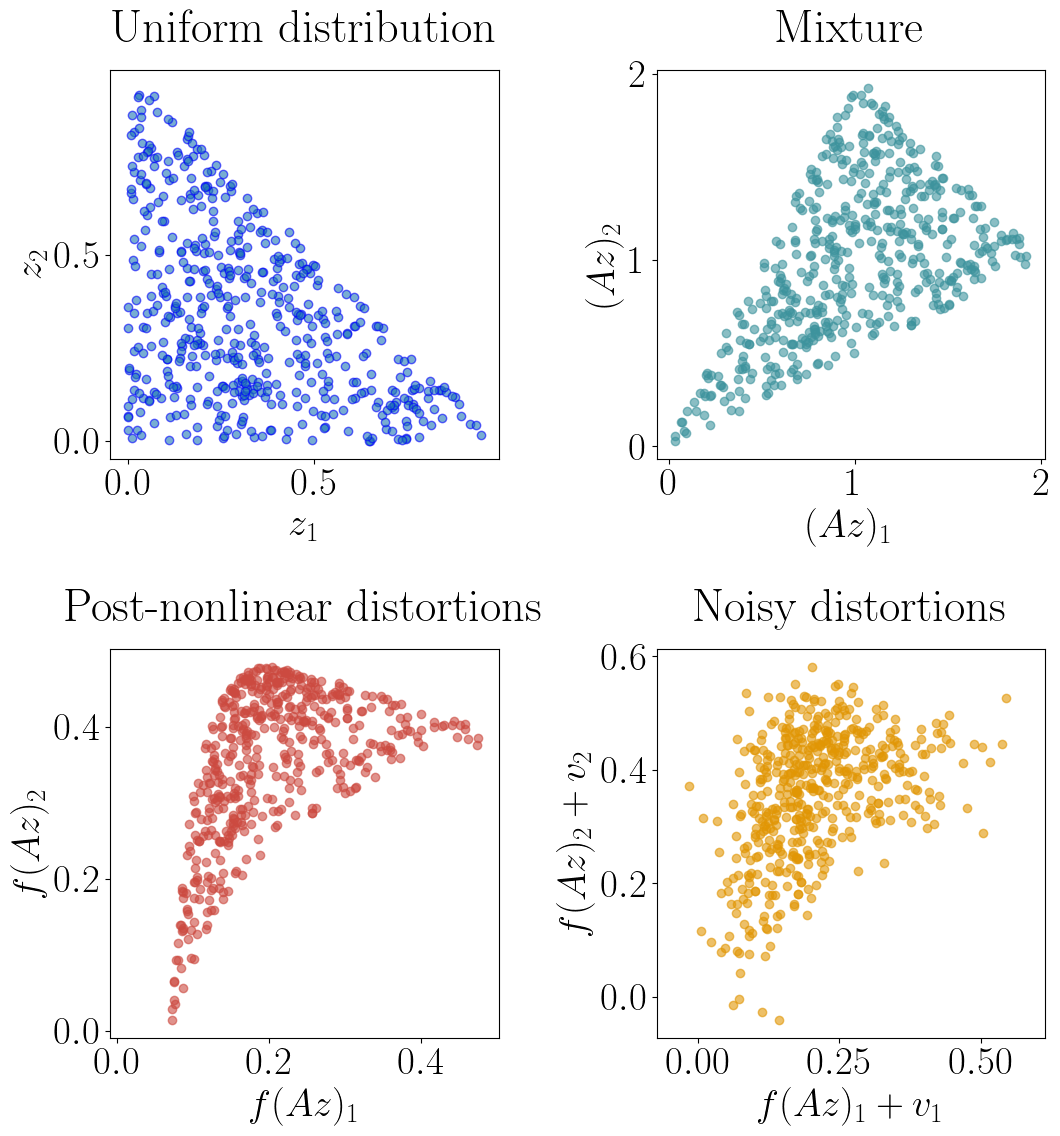

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Use LaTeX fonts for Matplotlib
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.size": 28  # Adjust this value for larger/smaller fonts
})

# Function to sample points uniformly within the simplex (triangle)
def sample_points_in_simplex(n_points=1000):
    u = np.random.uniform(0, 1, (n_points, 2))
    mask = u[:, 0] + u[:, 1] <= 1
    return u[mask]

# Linear transformation matrix
A = np.array([[2, 1], [1, 2]])

# Nonlinear transformation function
def nonlinear_transform(z):
    return np.array([0.07 * np.exp(z[:, 0]), 0.5 * np.tanh(z[:, 1])]).T

# Generate points in the simplex
n_points = 1000
z = sample_points_in_simplex(n_points)

# Apply linear transformation
Az = z @ A.T

# Apply nonlinear transformation
fAz = nonlinear_transform(Az)

# Apply Gaussian noise to the nonlinearly transformed data
noise_std = 0.05  # Standard deviation of Gaussian noise
fAz_noisy = fAz + np.random.normal(0, noise_std, fAz.shape)

# Create the plots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))  # Adjust figure size as needed

# Function to make square plots with automatic limits
def make_square(ax):
    ax.set_aspect('equal')
    x_limits = ax.get_xlim()
    y_limits = ax.get_ylim()
    min_limit = min(x_limits[0], y_limits[0])
    max_limit = max(x_limits[1], y_limits[1])
    ax.set_xlim(min_limit, max_limit)
    ax.set_ylim(min_limit, max_limit)

# Plot 1: Points in the simplex
axes[0, 0].scatter(z[:, 0], z[:, 1], alpha=0.6, edgecolor='blue')
axes[0, 0].set_title("Uniform distribution", pad=20)
axes[0, 0].set_xlabel('$z_1$')
axes[0, 0].set_ylabel('$z_2$')
make_square(axes[0, 0])

# Plot 2: Linearly transformed points
axes[0, 1].scatter(Az[:, 0], Az[:, 1], alpha=0.6, color=(61/255,147/255,157/255))
axes[0, 1].set_title("Mixture", pad=20)
axes[0, 1].set_xlabel('$(Az)_1$')
axes[0, 1].set_ylabel('$(Az)_2$')
make_square(axes[0, 1])

# Plot 3: Nonlinearly transformed points
axes[1, 0].scatter(fAz[:, 0], fAz[:, 1], alpha=0.6, color=(204/255,74/255,64/255))
axes[1, 0].set_title("Post-nonlinear distortions", pad=20)
axes[1, 0].set_xlabel('$f(Az)_1$')
axes[1, 0].set_ylabel('$f(Az)_2$')
make_square(axes[1, 0])

# Plot 4: Nonlinearly transformed points with Gaussian noise
axes[1, 1].scatter(fAz_noisy[:, 0], fAz_noisy[:, 1], alpha=0.6, color=(225/255, 150/255, 4/255))
axes[1, 1].set_title("Noisy distortions", pad=20)
axes[1, 1].set_xlabel('$f(Az)_1 + v_1$')
axes[1, 1].set_ylabel('$f(Az)_2 + v_2$')
make_square(axes[1, 1])

plt.subplots_adjust(hspace=-0.2, wspace=-0.85)

plt.tight_layout()

plt.savefig('figures/pnl-psca-scatter.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()